# IAM Job Data WordCloud
Generate a WordCloud from IAM job descriptions

In [53]:
# Standard Modules
import re
from os import path

# External Libraries
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from PIL import Image
from wordcloud import WordCloud

# Visualization Libraries
import matplotlib.pyplot as plt
% matplotlib inline

In [54]:
# Load in the job listings from csv to a pandas dataframe
df = pd.read_csv("../data/raw/iam-job-data.csv")

In [55]:
# Let's take a look at first 5 rows of the dataset
df.head()

,Unnamed: 0,index,title,displayTitle,normTitle,company,companyRating,companyReviewCount,estimatedSalary.max,estimatedSalary.min,...,jobLocationState,remoteLocation,companyName,companyText,locationName,shortLocationName,newJob,publishedDate,fullDescription,experienceLevel
0,0,30,Associate Director – Identity and Access Manag...,Associate Director – Identity and Access Manag...,Associate Director Identity Access Management,CSL Behring,3.1,289,NaN,NaN,...,PA,False,NaN,NaN,NaN,NaN,False,1671602400000,"<ul style=""list-style-type:circle;margin-top: ...",MID_LEVEL
1,1,32,PAM Engineer (Privileged Access Management Eng...,PAM Engineer (Privileged Access Management Eng...,Pam Engineer,Navy Federal Credit Union,3.9,1835,NaN,NaN,...,FL,False,NaN,NaN,NaN,NaN,False,1673416800000,"<ul style=""list-style-type:circle;margin-top: ...",MID_LEVEL
2,2,33,Network Administrator (Dual Locations),Network Administrator (Dual Locations),Network Administrator,Painters Supply and Equipment Co.,3.8,16,NaN,NaN,...,MI,False,NaN,NaN,NaN,NaN,False,1674280800000,"<ul style=""list-style-type:circle;margin-top: ...",MID_LEVEL
3,3,88,Systems Administrator,Systems Administrator,System Administrator,Jacobs,3.9,5203,NaN,NaN,...,FL,False,NaN,NaN,NaN,NaN,False,1675404000000,"<ul style=""list-style-type:circle;margin-top: ...",MID_LEVEL
4,4,95,SR. Identity Engineer,SR. Identity Engineer,Senior Identity Engineer,Tech Matrix Software Solutions Pvt. Ltd,0.0,1,NaN,NaN,...,NaN,True,Tech Matrix Software Solutions Pvt. Ltd,Tech Matrix Software Solutions Pvt. Ltd jobs i...,Remote,Remote,False,1675144800000,"<ul style=""list-style-type:circle;margin-top: ...",ENTRY_LEVEL


In [56]:
# Gather some info about the dataset
job_count = df.shape[0]
feature_count = df.shape[1]

print(
    f"There are {job_count} jobs and {feature_count} features in this dataset.")


There are 5836 jobs and 25 features in this dataset.


In [57]:
# fullDescription is the feature we want to build the wordcloud from
# Let's create a copy dataframe with only title and fullDescription

descriptions = df[["title", "fullDescription"]].copy()
descriptions.head()


,title,fullDescription
0,Associate Director – Identity and Access Manag...,"<ul style=""list-style-type:circle;margin-top: ..."
1,PAM Engineer (Privileged Access Management Eng...,"<ul style=""list-style-type:circle;margin-top: ..."
2,Network Administrator (Dual Locations),"<ul style=""list-style-type:circle;margin-top: ..."
3,Systems Administrator,"<ul style=""list-style-type:circle;margin-top: ..."
4,SR. Identity Engineer,"<ul style=""list-style-type:circle;margin-top: ..."


In [58]:
# There is html formatting data we don't care about, so let's clean that up

# We will use BeautifulSoup to parse the html and return just the text
def remove_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub("^\n+", "", text)    # Remove leading newline character
    return text

# Replace the values in the dataframe
descriptions["fullDescription"] = descriptions["fullDescription"].map(
    remove_tags)
descriptions.head()


,title,fullDescription
0,Associate Director – Identity and Access Manag...,8+ years of experience in identity and access ...
1,PAM Engineer (Privileged Access Management Eng...,"Contribute to PAM Security Strategy, including..."
2,Network Administrator (Dual Locations),Exceptional time management and project manage...
3,Systems Administrator,Systems Administrators perform admin level sup...
4,SR. Identity Engineer,Years of solid hands-on experience in Identity...


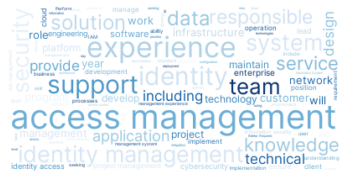

In [59]:
# Create a WordCloud from the descriptions

# Extract the full descriptions as a single string
text = descriptions["fullDescription"].str.cat(sep=" ", na_rep="")

# Create and generate a word cloud image
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      colormap="Blues",
                      background_color="white",
                      font_path="fonts/Inter-Regular.ttf").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()